# Problem 8

In [113]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB

training_data = pd.read_csv('./penguins_train.csv')
test_data = pd.read_csv('./penguins_test.csv')

In [ ]:
# task a
ad = training_data[training_data['species'] == 'Adelie']
nad = training_data[training_data['species'] == 'notAdelie']

# means and stds
print('For Adelie')
print('val\tbill_length_mm\tbill_depth_mm\tflipper_length_mm\tbody_mass_g')
print('mean\t', ad['bill_length_mm'].mean(), '\t', ad['bill_depth_mm'].mean(), '\t', ad['flipper_length_mm'].mean(), '\t', ad['body_mass_g'].mean())
print('std\t', ad['bill_length_mm'].std(), '\t', ad['bill_depth_mm'].std(), '\t', ad['flipper_length_mm'].std(), '\t', ad['body_mass_g'].std())

print('For notAdelie')
print('val\tbill_length_mm\tbill_depth_mm\tflipper_length_mm\tbody_mass_g')
print('mean\t', nad['bill_length_mm'].mean(), '\t', nad['bill_depth_mm'].mean(), '\t', nad['flipper_length_mm'].mean(), '\t', nad['body_mass_g'].mean())
print('std\t', nad['bill_length_mm'].std(), '\t', nad['bill_depth_mm'].std(), '\t', nad['flipper_length_mm'].std(), '\t', nad['body_mass_g'].std())

# class probabilities
print('Class probabilities')
prob_adelie = (len(ad)+1)/(2+len(training_data))
prob_nadelie = (len(nad)+1)/(2+len(training_data))
print('prob_adelie', prob_adelie)
print('prob_nadelie', prob_nadelie)

In [138]:
# task c
import scipy.stats

# ignore it, focus on norms
mean_x1_a = ad['bill_length_mm'].mean()
mean_x2_a = ad['bill_depth_mm'].mean()
mean_x3_a = ad['flipper_length_mm'].mean()
mean_x4_a = ad['body_mass_g'].mean()

mean_x1_na = nad['bill_length_mm'].mean()
mean_x2_na = nad['bill_depth_mm'].mean()
mean_x3_na = nad['flipper_length_mm'].mean()
mean_x4_na = nad['body_mass_g'].mean()

std_x1_a = ad['bill_length_mm'].std()
std_x2_a = ad['bill_depth_mm'].std()
std_x3_a = ad['flipper_length_mm'].std()
std_x4_a = ad['body_mass_g'].std()

std_x1_na = nad['bill_length_mm'].std()
std_x2_na = nad['bill_depth_mm'].std()
std_x3_na = nad['flipper_length_mm'].std()
std_x4_na = nad['body_mass_g'].std()

prior_adelie = (len(ad)+1)/(2+len(training_data))
prior_notadelie = (len(nad)+1)/(2+len(training_data))
norm_x1_a = scipy.stats.norm(mean_x1_a, std_x1_a)
norm_x2_a = scipy.stats.norm(mean_x2_a, std_x2_a)
norm_x3_a = scipy.stats.norm(mean_x3_a, std_x3_a)
norm_x4_a = scipy.stats.norm(mean_x4_a, std_x4_a)

norm_x1_na = scipy.stats.norm(mean_x1_na, std_x1_na)
norm_x2_na = scipy.stats.norm(mean_x2_na, std_x2_na)
norm_x3_na = scipy.stats.norm(mean_x3_na, std_x3_na)
norm_x4_na = scipy.stats.norm(mean_x4_na, std_x4_na)

def classify(row):
    P = prior_adelie*norm_x1_a.pdf(row['bill_length_mm'])*norm_x2_a.pdf(row['bill_depth_mm'])*norm_x3_a.pdf(row['flipper_length_mm'])*norm_x4_a.pdf(row['body_mass_g'])
    P = P/(P + prior_notadelie*norm_x1_na.pdf(row['bill_length_mm'])*norm_x2_na.pdf(row['bill_depth_mm'])*norm_x3_na.pdf(row['flipper_length_mm'])*norm_x4_na.pdf(row['body_mass_g']))
    if P >= 0.5:
        return 'Adelie'
    else:
        return 'notAdelie'

right = 0
for row in test_data.iterrows():
    res = classify(row[1])
    if res == row[1]['species']:
        right+=1

print('Accuracy on test data =', right/len(test_data))

Accuracy on test data = 0.92


# Problem 9

Model coefficients
[[ 1.57894316e+00 -9.79289548e-01  1.01773624e-03  5.10530046e-02]] [0.0364156]
Accuracy on train data
1.0
Accuracy on test data
0.9866666666666667
Penguin number 10 in training dataset has linear response = 2.6439457287011408 bill_depth_mm          16.6
bill_length_mm         36.5
body_mass_g          2850.0
flipper_length_mm     181.0
Name: 9, dtype: float64


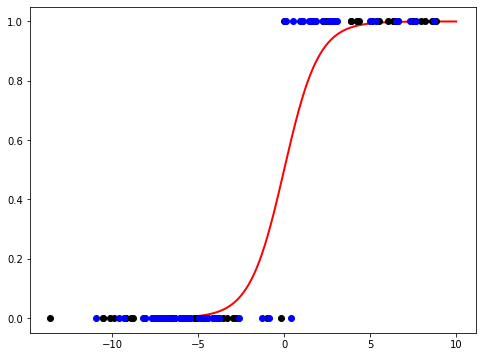

In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy.special import expit, logit

def calculate_x(coef, intercept, x):
    toret = []
    for _, row in x.iterrows():
        t = coef[0]*row['bill_depth_mm']+coef[1]*row['bill_length_mm']+coef[2]*row['body_mass_g']+coef[3]*row['flipper_length_mm'] + intercept
        toret.append(t)
    return toret

training_data = pd.read_csv('./penguins_train.csv')
test_data = pd.read_csv('./penguins_test.csv')

X_train = training_data[training_data.columns.difference(['species'])]
y_train = training_data['species'].apply(lambda x: 1 if x=='Adelie' else 0)

X_test = test_data[test_data.columns.difference(['species'])]
y_test = test_data['species'].apply(lambda x: 1 if x=='Adelie' else 0)

model = LogisticRegression().fit(X_train, y_train)
print('Model coefficients')
print(model.coef_, model.intercept_)

print('Accuracy on train data')
print(model.score(X_train, y_train))

print('Accuracy on test data')
print(model.score(X_test, y_test))

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(calculate_x(model.coef_[0], model.intercept_[0], X_train), y_train, color="black", zorder=20)
plt.scatter(calculate_x(model.coef_[0], model.intercept_[0], X_test), y_test, color="blue", zorder=20)

x_curve = np.linspace(-5, 10, 300)

loss = expit(x_curve).ravel()
plt.plot(x_curve, loss, color="red", linewidth=2)

print('Penguin number 10 in training dataset has linear response =', calculate_x(model.coef_[0], model.intercept_[0], X_train)[9], X_train.iloc[9])

# Problem 11

In [23]:
import pandas as pd
import numpy as np
import random

def generate_set(n):
    x1 = []
    x2 = []
    y = []
    df = pd.DataFrame()
    for i in range(0,n):
        t = np.random.choice([0,1], p=[0.55,0.45])
        y.append(t)
        if t == 0:
            decision = np.random.choice([0,1,2,3,4,5], p=[0.2,0.4,0,0.1,0.2,0.1])
            if decision == 0:
                x1.append(0)
                x2.append(0)
            elif decision == 1:
                x1.append(0)
                x2.append(1)
            elif decision == 3:
                x1.append(1)
                x2.append(0)
            elif decision ==4 :
                x1.append(1)
                x2.append(1)
            else:
                x1.append(1)
                x2.append(2)
        else:
            decision = np.random.choice([0,1,2,3,4,5], p=[0.6,0.1,0.1,0.1,0,0.1])
            if decision == 0:
                x1.append(0)
                x2.append(0)
            elif decision == 1:
                x1.append(0)
                x2.append(1)
            elif decision == 2:
                x1.append(0)
                x2.append(2)
            elif decision == 3:
                x1.append(1)
                x2.append(0)
            else:
                x1.append(1)
                x2.append(2)
    df['x1'] = x1
    df['x2'] = x2
    df['y'] = y
    return df

test_set = generate_set(10000)
training_sets = []

for i in range(4,14):
    training_sets.append(generate_set(2**i))

With Naive Bayes


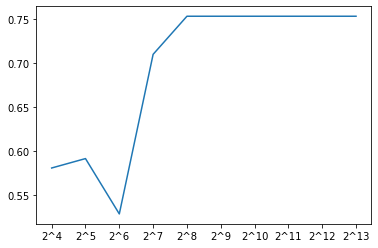

With Logistic Regression without interaction


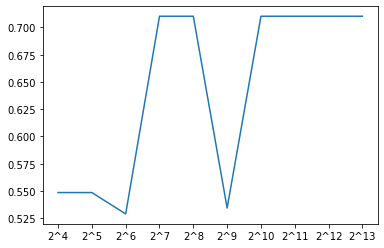

With Logistic Regression with interaction


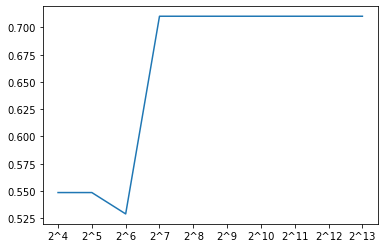

With SVM


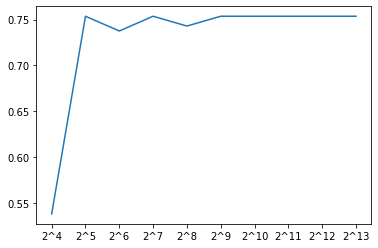

With Dummy


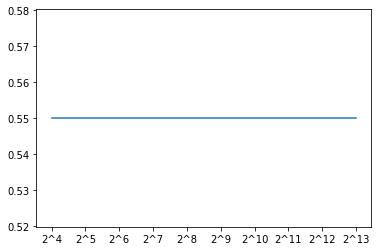

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression #already without interaction term. in order to use a interaction term create another column
from sklearn.svm import SVC
import matplotlib.pyplot as plt

x = ['2^4','2^5','2^6','2^7','2^8','2^9','2^10','2^11','2^12','2^13']
# NB
accuracies = []
for i in range(0,10):
    clf = GaussianNB().fit(training_sets[i][training_sets[i].columns.difference(['y'])], training_sets[i]['y'].astype('int'))
    accuracy = clf.score(test_set[test_set.columns.difference(['y'])], test_set['y'].astype('int'))
    accuracies.append(accuracy)

print('With Naive Bayes')
plt.plot(x, accuracies)
plt.show()

#LR without interaction
accuracies = []
for i in range(0,10):
    clf = LogisticRegression().fit(training_sets[i][training_sets[i].columns.difference(['y'])], training_sets[i]['y'].astype('int'))
    accuracy = clf.score(test_set[test_set.columns.difference(['y'])], test_set['y'].astype('int'))
    accuracies.append(accuracy)

print('With Logistic Regression without interaction')
plt.plot(x, accuracies)
plt.show()

#LR with interaction
accuracies = []
for i in range(0,10):
    X = training_sets[i][training_sets[i].columns.difference(['y'])]
    X_test = test_set[test_set.columns.difference(['y'])]
    X['interaction'] = X['x1']*X['x2']
    X_test['interaction'] = X_test['x1']*X_test['x2']

    clf = LogisticRegression().fit(X, training_sets[i]['y'].astype('int'))
    accuracy = clf.score(X_test, test_set['y'].astype('int'))
    accuracies.append(accuracy)

print('With Logistic Regression with interaction')
plt.plot(x, accuracies)
plt.show()

# SVM
accuracies = []
for i in range(0,10):
    clf = SVC().fit(training_sets[i][training_sets[i].columns.difference(['y'])], training_sets[i]['y'].astype('int'))
    accuracy = clf.score(test_set[test_set.columns.difference(['y'])], test_set['y'].astype('int'))
    accuracies.append(accuracy)

print('With SVM')
plt.plot(x, accuracies)
plt.show()

# Dummy
accuracies = []
for i in range(0,10):
    accuracies.append(0.55)

print('With Dummy')
plt.plot(x, accuracies)
plt.show()


# Problem 14

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

training_set = pd.read_csv('./data_svm_train.csv')
test_set = pd.read_csv('./data_svm_test.csv')

X_train = training_set['x1'].to_numpy().reshape(-1,1)
y_train = training_set['y']

X_test = test_set['x1'].to_numpy().reshape(-1,1)
y_test = test_set['y']

In [2]:
# kernel linear
print('WITH LINEAR KERNEL')

print('Changing C')
for c in [1,5,10,20,50,100]:
    clf = SVC(kernel='linear', C=c).fit(X_train, y_train)
    print(clf.score(X_test, y_test))

print('Changing tol')
for t in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]:
    clf = SVC(kernel='linear', tol=t).fit(X_train, y_train)
    print(clf.score(X_test, y_test))

WITH LINEAR KERNEL
Changing C
0.62
0.62
0.62
0.62
0.62
0.62
Changing tol
0.62
0.62
0.62
0.62
0.615
0.61


In [3]:
print('WITH RBF KERNEL')
print('Standard')
clf = SVC(kernel='rbf').fit(X_train, y_train)
print(clf.score(X_test, y_test))

print('Changing C, gamma scale')
print('C\tAccuracy')
for c in [1,5,10,20,50,100]:
    clf = SVC(kernel='rbf', C=c).fit(X_train, y_train)
    print(c, '\t', clf.score(X_test, y_test))

print('Changing C, gamma auto')
print('C\tAccuracy')
for c in [1,5,10,20,50,100]:
    clf = SVC(kernel='rbf', C=c, gamma='auto').fit(X_train, y_train)
    print(c, '\t', clf.score(X_test, y_test))

print('Changing tol')
print('Changing tol')
for t in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]:
    clf = SVC(kernel='rbf', tol=t).fit(X_train, y_train)
    print(clf.score(X_test, y_test))



WITH RBF KERNEL
Standard
0.78
Changing C, gamma scale
C	Accuracy
1 	 0.78
5 	 0.8
10 	 0.8
20 	 0.805
50 	 0.805
100 	 0.8
Changing C, gamma auto
C	Accuracy
1 	 0.8
5 	 0.805
10 	 0.805
20 	 0.8
50 	 0.8
100 	 0.8
Changing tol
Changing tol
0.78
0.78
0.78
0.78
0.78
0.78


In [4]:
training_set2 = training_set
test_set2 = test_set

X_train2 = training_set['x1']
x2 = X_train2.apply(lambda x: x**2).rename('x2')
X_train2 = pd.concat([X_train2, x2], axis=1)
y_train2 = training_set['y']

X_test2 = test_set['x1']
x2t = X_test2.apply(lambda x: x**2).rename('x2')
X_test2 = pd.concat([X_test2, x2t], axis=1)
y_test2 = test_set['y']

clf = SVC(kernel='linear').fit(X_train2, y_train2)
clf.score(X_test2, y_test2)

0.8

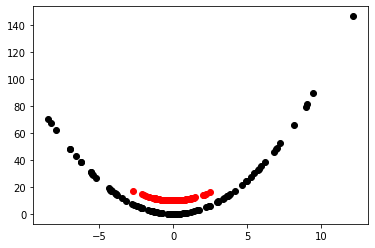

In [8]:
import matplotlib.pyplot as plt

xm1 = []
ym1 = []
xp1 = []
yp1 = []

for i in range(0, len(X_test2)):
    if y_test2[i] == -1:
        xm1.append(X_test2.iloc[i]['x1'])
        ym1.append(X_test2.iloc[i]['x2'] + 10)
    else:
        xp1.append(X_test2.iloc[i]['x1'])
        yp1.append(X_test2.iloc[i]['x2'])


plt.scatter(xm1, ym1, color='red')
plt.scatter(xp1, yp1, color='black')
plt.show()

# Problem 13

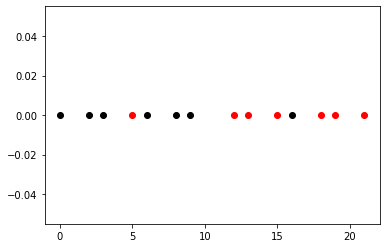

In [12]:
import matplotlib.pyplot as plt

xp = [0, 2, 3, 6, 8, 9, 16]
xm = [5, 12, 13, 15, 18, 19, 21]
y = [0, 0, 0, 0, 0, 0, 0]
plt.scatter(xp, y, color='black')

plt.scatter(xm, y, color='red')